# EDA FINAL

## Ici se touvent toutes les analyses et le nettoyage des data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, FunctionTransformer

Pour debuter, analysons chaque dataset afin de choisir les eventuelles variables qui constitueront la dataset finale

## Fonctions essentielles

In [1]:
#fonction pour decrire la data : my_description()
def my_description(data):
    print(f'''Voici une breve description de la data : \n
{data.describe()}\n

Valeurs manquantes : \n
{data.isna().sum()}\n

Valeurs dupliquees : \n
{data.duplicated().sum()}\n

Voila la data en bref : \n
{data.head(5)}

Voila les colonnes : \n
{data.columns}
    ''')

## REMPLISSAGE DES NAN

In [5]:
my_df = pd.read_csv('datasets/togo_dataset_final_propre.csv')

In [6]:
my_df.head()

demande_id    region prefecture    commune   quartier_x  \
0       D001  Centrale  Sotouboua  Sotouboua  Nyékonakpoé   
1       D001  Centrale  Sotouboua  Sotouboua  Nyékonakpoé   
2       D002      Kara      Binah    Pagouda      Hôpital   
3       D002      Kara      Binah    Pagouda      Hôpital   
4       D003  Plateaux       Ogou   Atakpamé           Bè   

               type_document categorie_document  nombre_demandes  \
0           Carte d'identité           Identité              168   
1           Carte d'identité           Identité              168   
2           Carte d'identité           Identité               17   
3           Carte d'identité           Identité               17   
4  Certificat de nationalité           Identité              104   

   delai_traitement_jours  taux_rejet  ... revenu_moyen_fcfa   annee mois  \
0                       1        0.00  ...          218170.0  2023.0  1.0   
1                       1        0.00  ...          218170.0  2023.0  1.0   
2                      22        0.09  ...          138235.0     NaN  NaN   
3                      22        0.09  ...          138235.0     NaN  NaN   
4                       4        0.08  ...          208908.0     NaN  NaN   

  nombre_demandes_mensuel  delai_moyen_jours taux_rejet_moyen delai_effectif  \
0                   950.0               18.4             0.07      17.800000   
1                   950.0               18.4             0.07      22.083333   
2                     NaN                NaN              NaN      26.000000   
3                     NaN                NaN              NaN      20.000000   
4                     NaN                NaN              NaN            NaN   

  nombre_rejete longueur_km temps_parcours_heures  
0          50.0       280.0              2.233333  
1          97.0       280.0              2.233333  
2          75.0         NaN                   NaN  
3          42.0         NaN                   NaN  
4           NaN       455.0              2.700000  

[5 rows x 68 columns]

In [7]:
my_description(my_df)

Voici une breve description de la data : 

       nombre_demandes  delai_traitement_jours   taux_rejet  age_demandeur  \
count       1296.00000             1296.000000  1296.000000    1296.000000   
mean         106.91821               22.582562     0.073511      54.144290   
std           55.92460               13.104957     0.042701      20.888341   
min           10.00000                1.000000     0.000000      18.000000   
25%           56.00000               11.000000     0.040000      37.000000   
50%          109.50000               22.000000     0.070000      55.000000   
75%          157.00000               34.000000     0.110000      71.000000   
max          200.00000               45.000000     0.150000      90.000000   

          latitude    longitude  personnel_capacite_jour  nombre_guichets  \
count  1144.000000  1144.000000              1144.000000      1144.000000   
mean      8.421743     1.017417               188.263986         7.738636   
std       1.293849     

In [9]:
(my_df['statut_centre'] != 'Actif').sum()


np.int64(152)

Tous les centres sont actifs donc le statut_centre est une variable a ne pas prendre en compte

<Axes: >

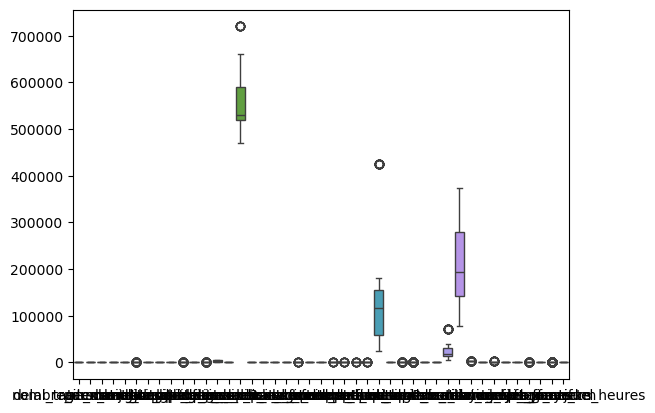

In [10]:
sns.boxplot(my_df)

# Analyse univariee et bivariee

In [17]:
corr = my_df.corr(numeric_only=True)

<Axes: >

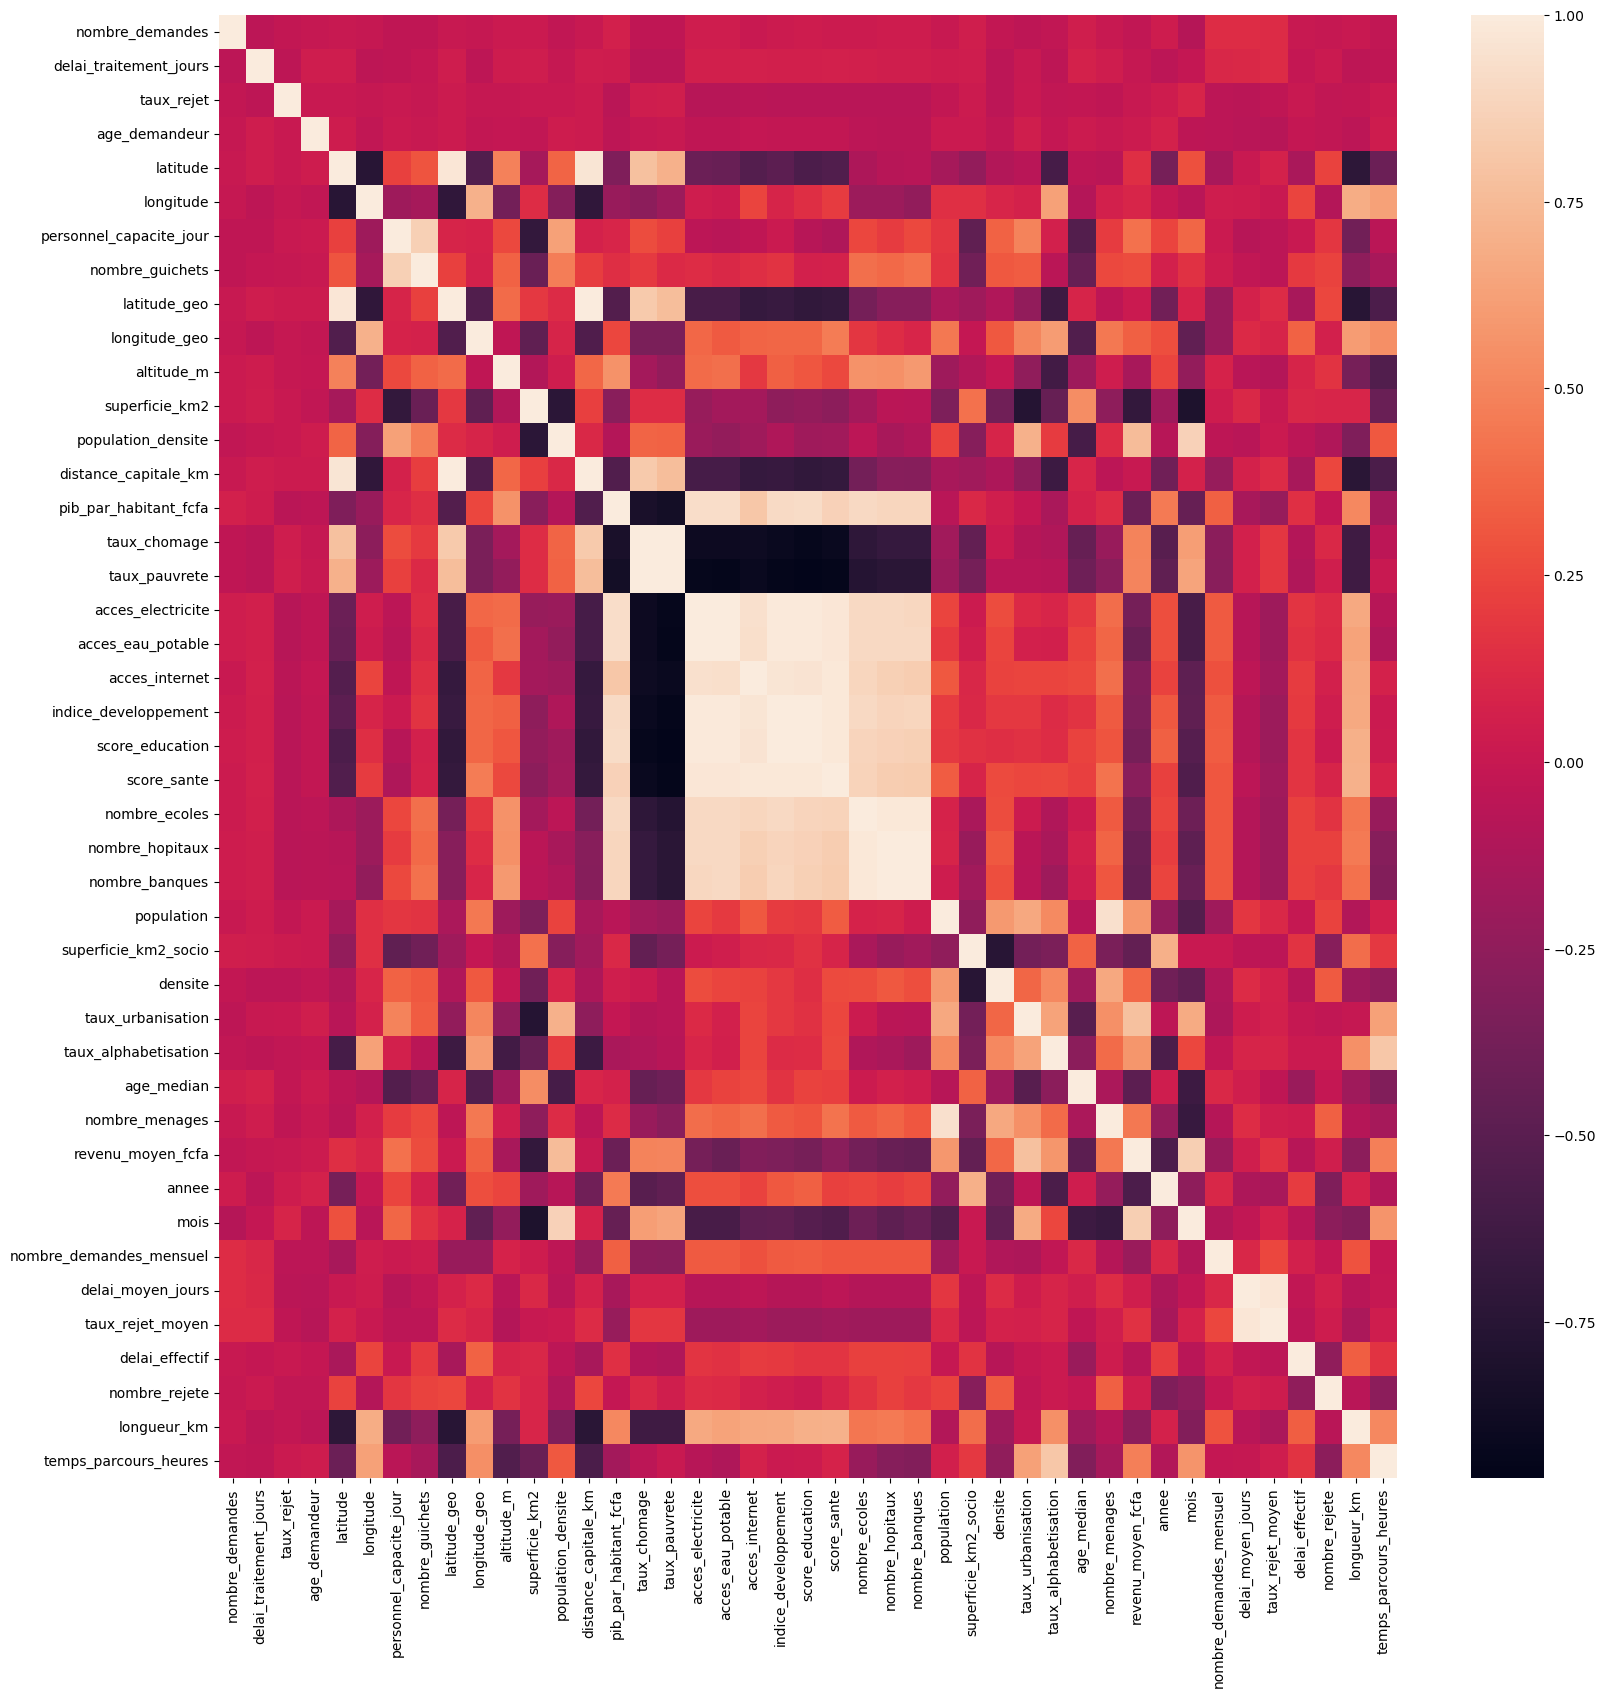

In [21]:
plt.figure(figsize=(19,19))
sns.heatmap(corr)

**-Total Heures & Capacité (0.94)** : C'est la corrélation la plus élevée. Cela confirme que l'extension des horaires d'ouverture est le levier principal pour augmenter la capacité d'accueil du personnel.

**-Nombre de Guichets & Capacité (0.85)** : Plus un centre possède de guichets, plus sa capacité journalière est forte. C'est une relation logique de dimensionnement physique.

**-Nombre de Guichets & Total Heures (0.87)** : Les centres les mieux équipés (plus de guichets) sont aussi ceux qui restent ouverts le plus longtemps.

**-L'Ancienneté** : Un facteur neutre

La ligne et la colonne anciennete_annees sont très sombres, avec des valeurs proches de zéro ou légèrement négatives (-0.12, -0.14, -0.086) :

L'âge d'un centre n'a aucune influence sur sa taille ou sa performance.


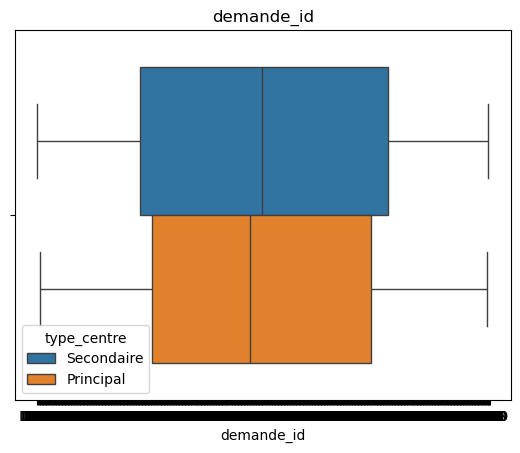

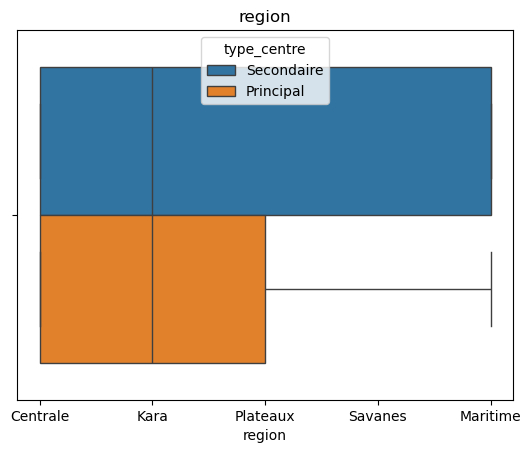

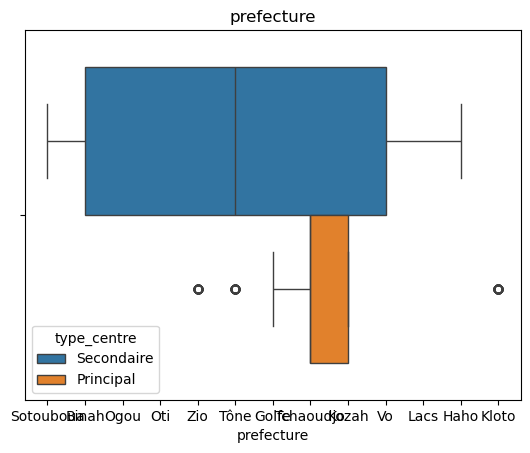

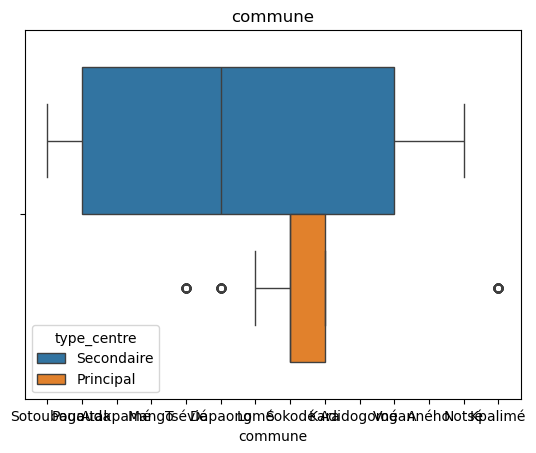

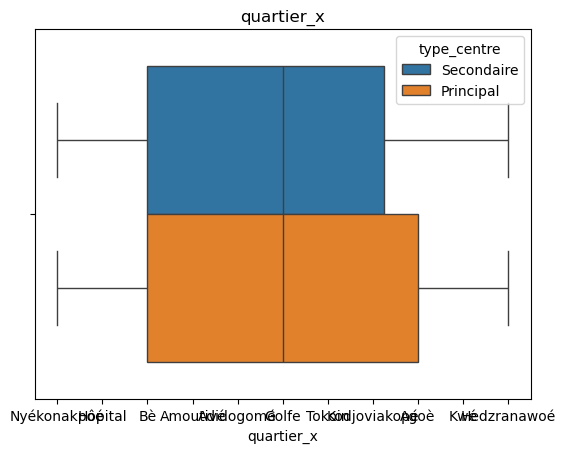

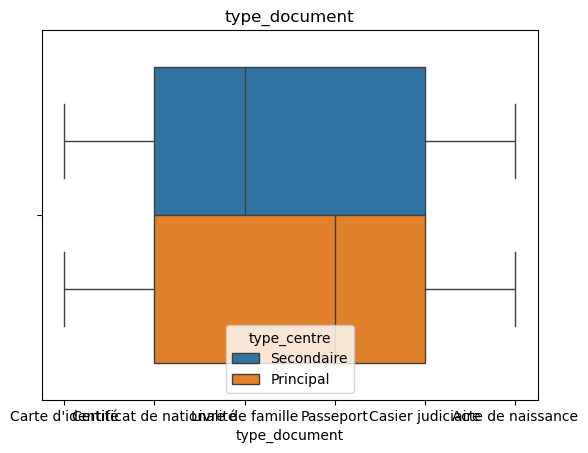

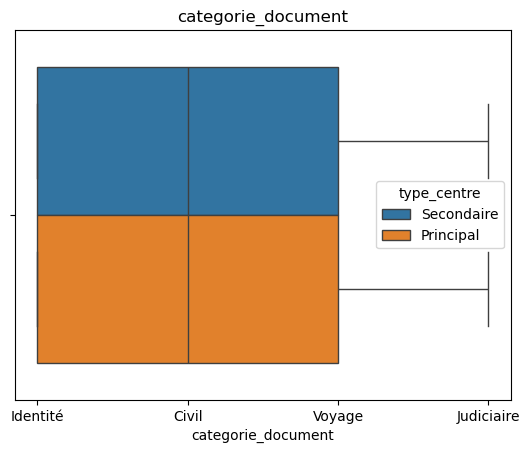

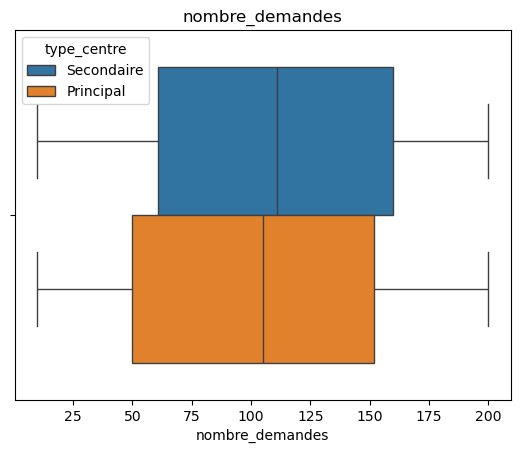

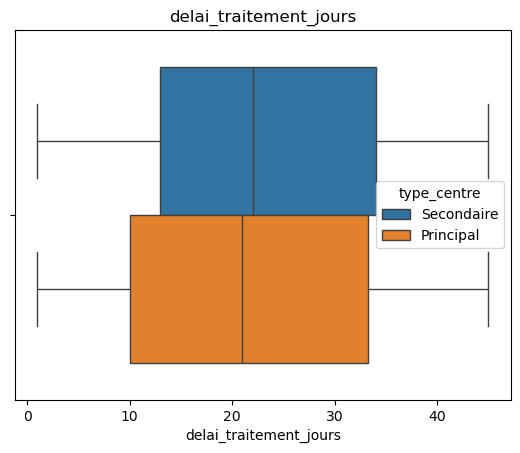

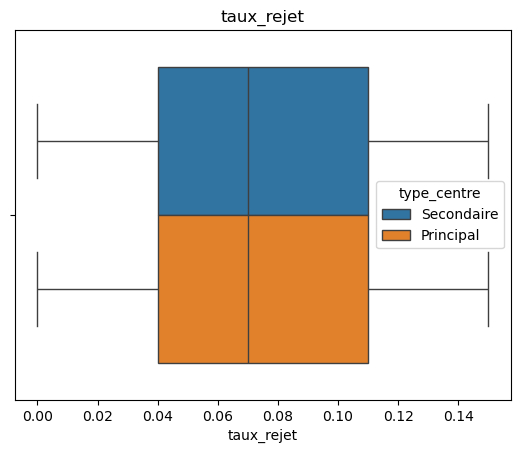

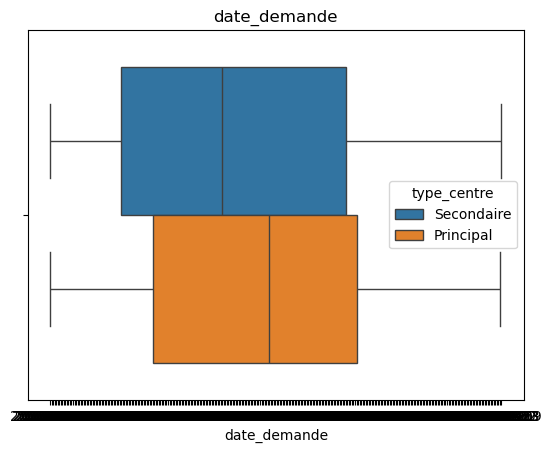

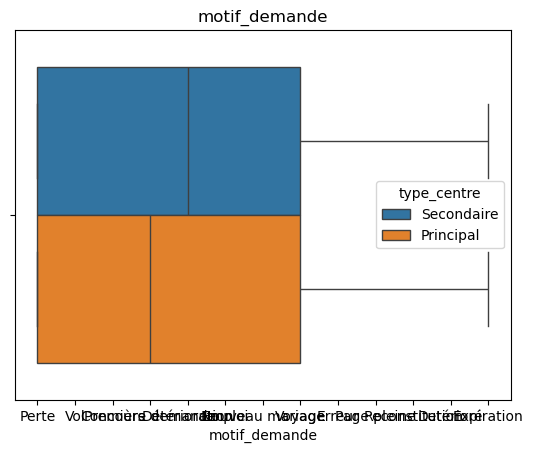

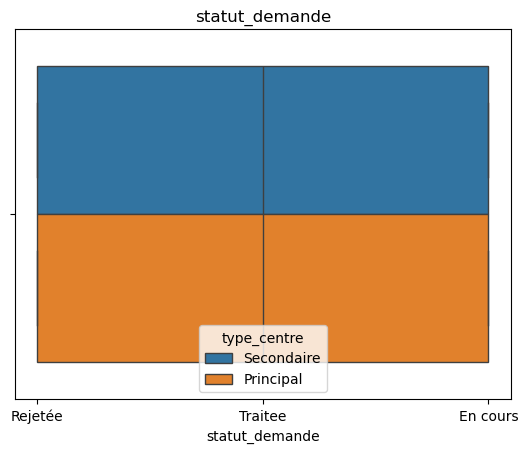

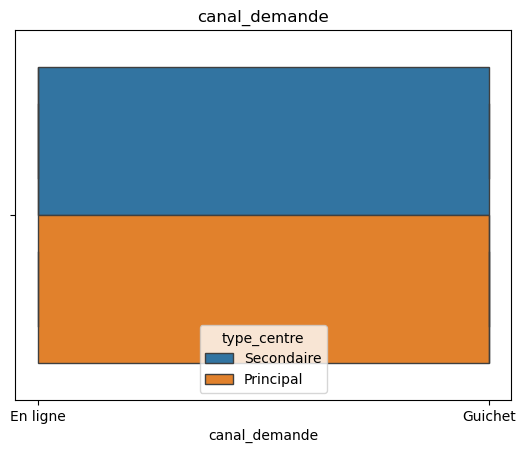

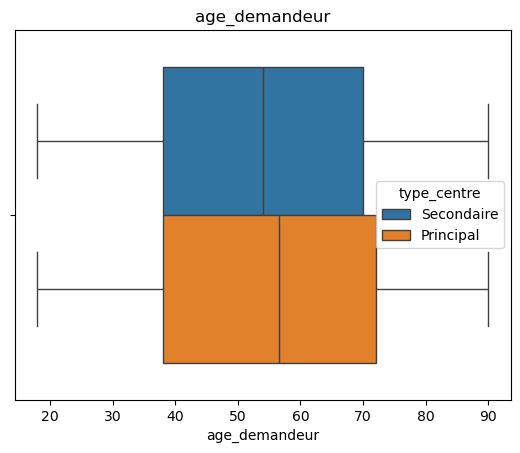

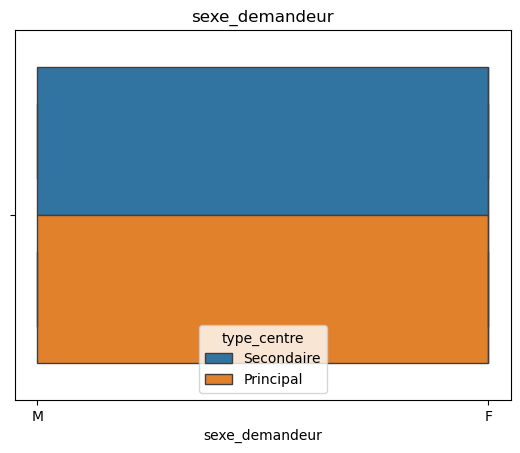

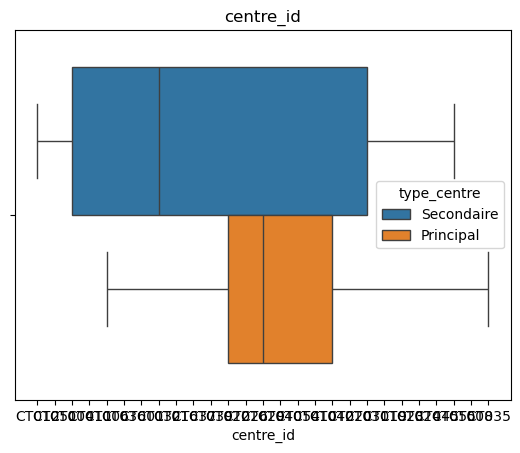

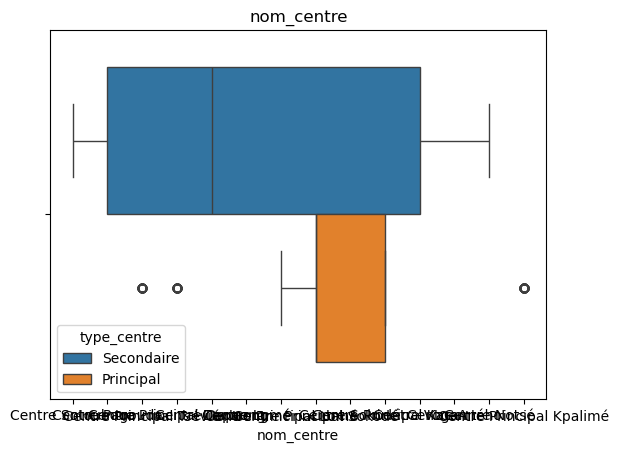

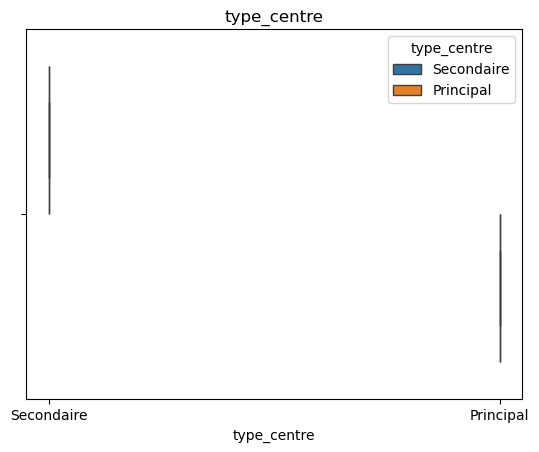

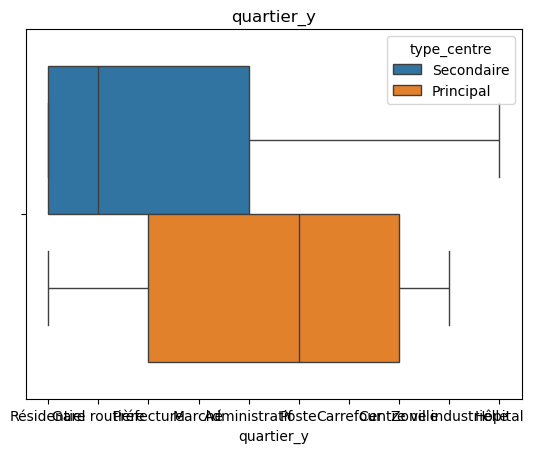

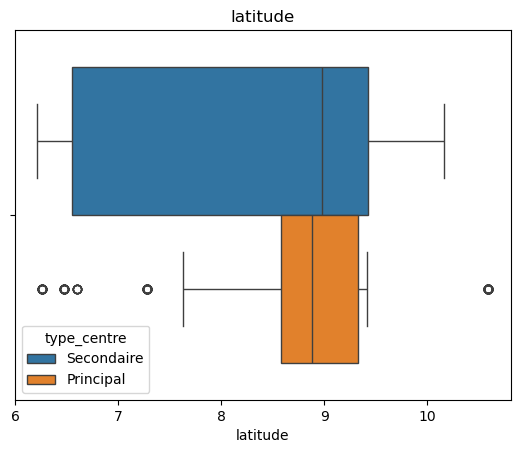

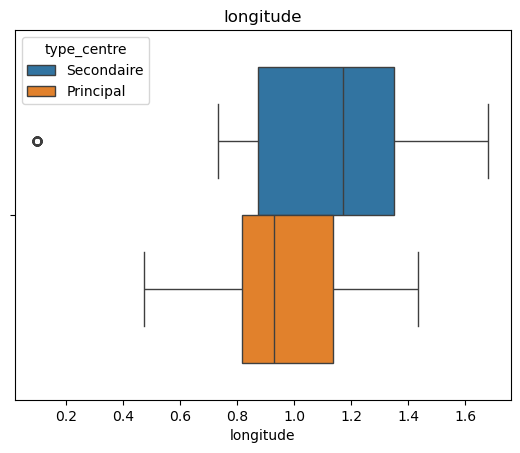

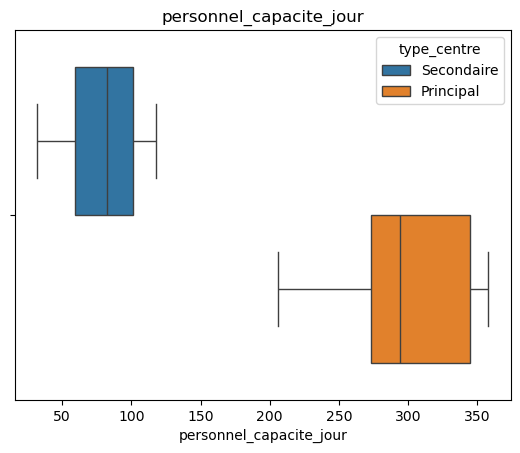

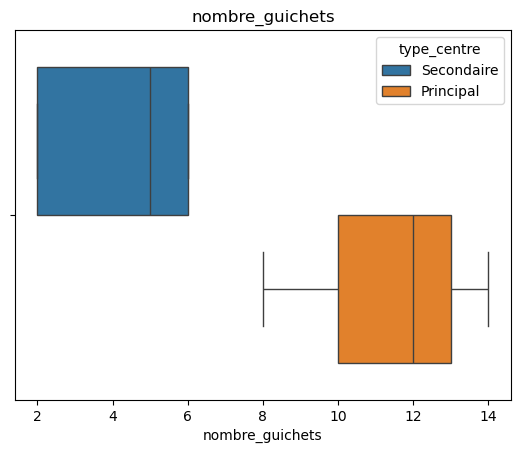

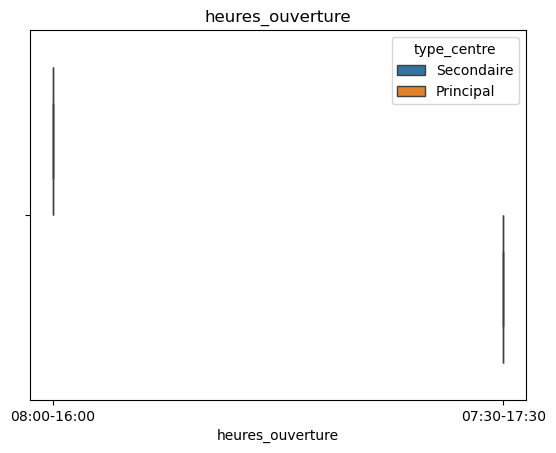

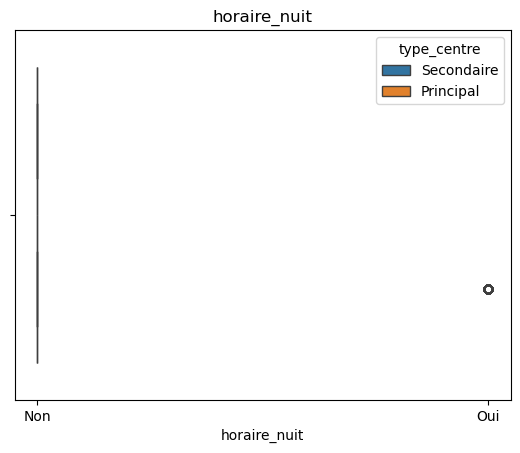

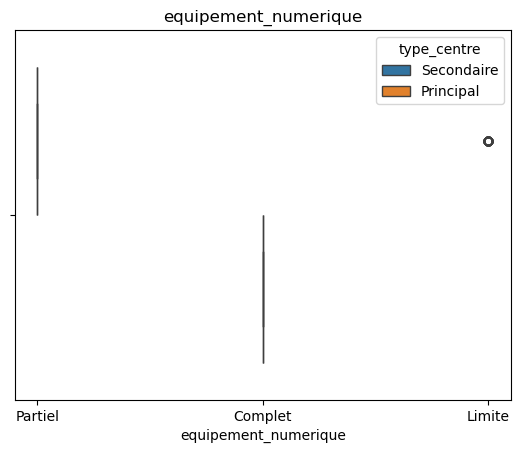

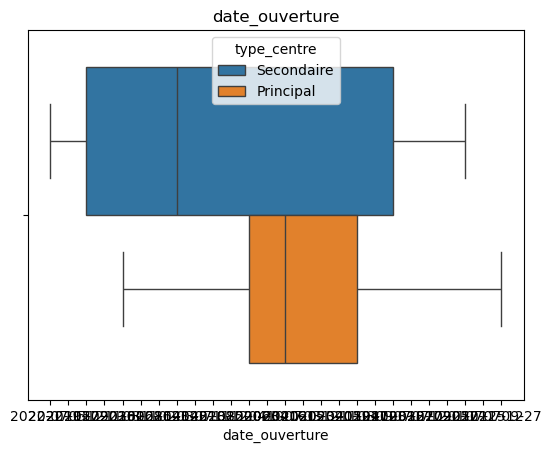

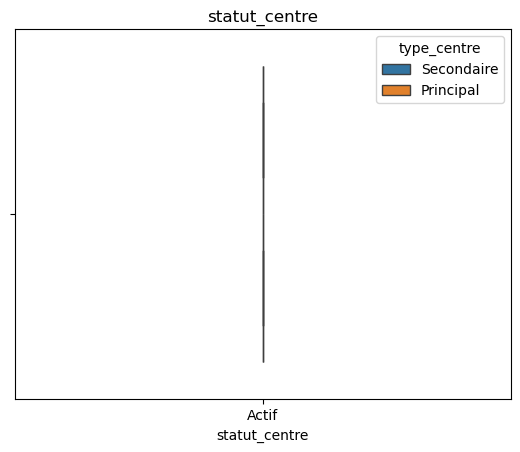

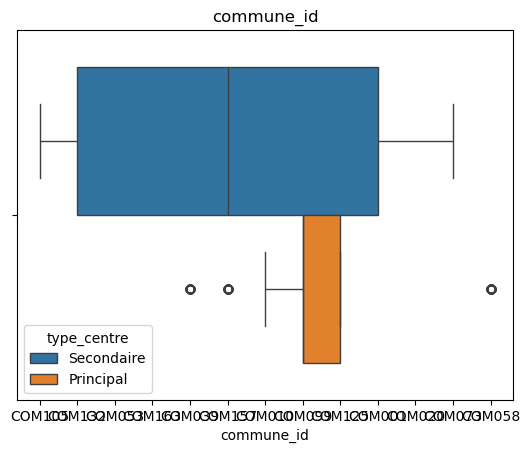

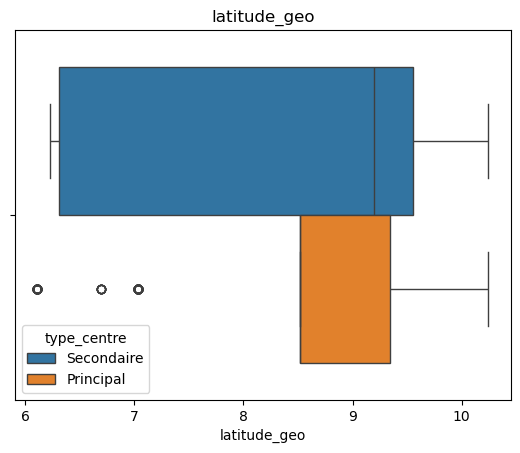

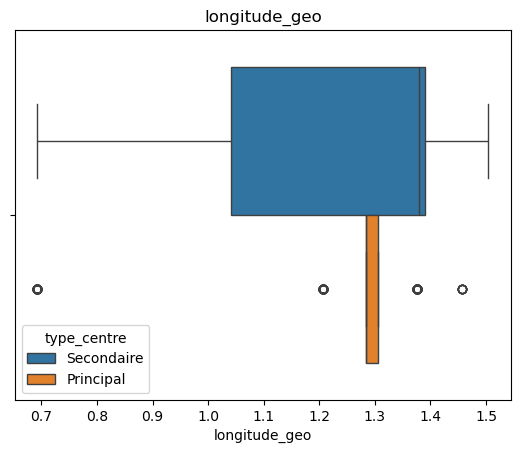

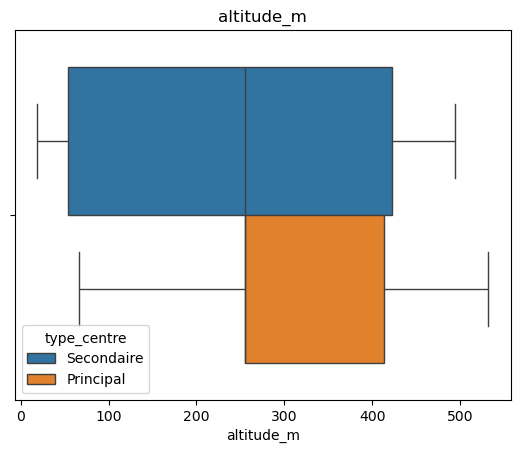

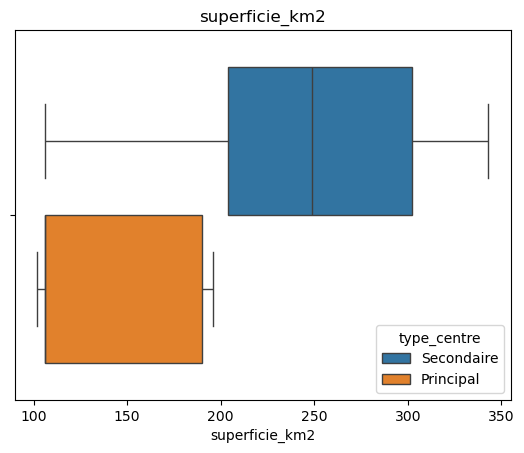

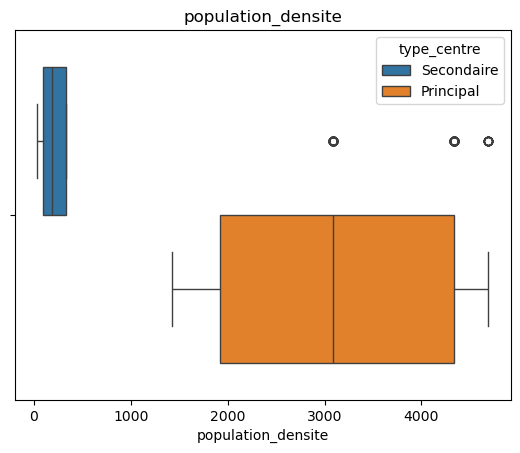

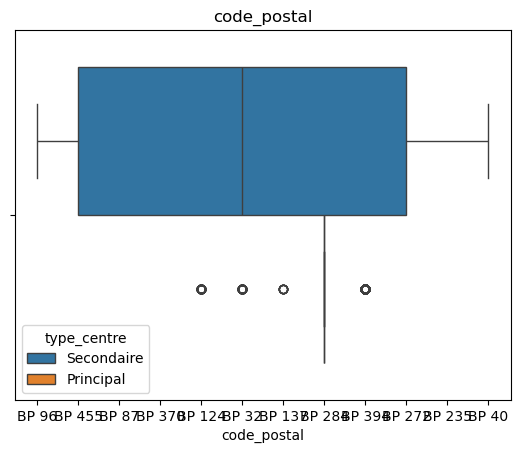

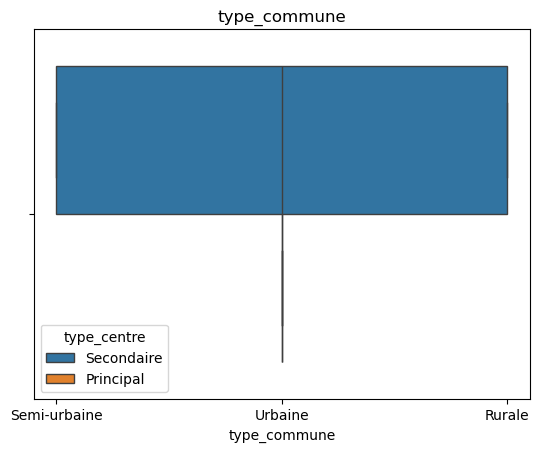

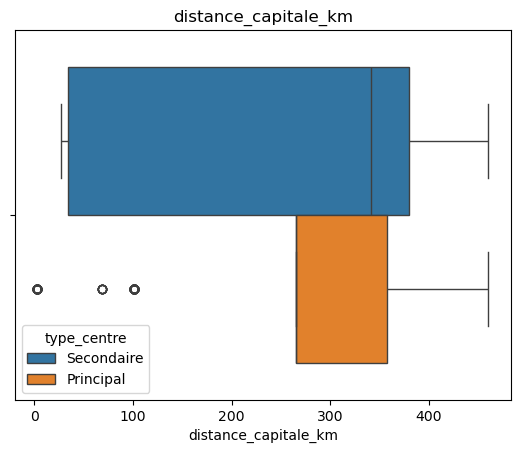

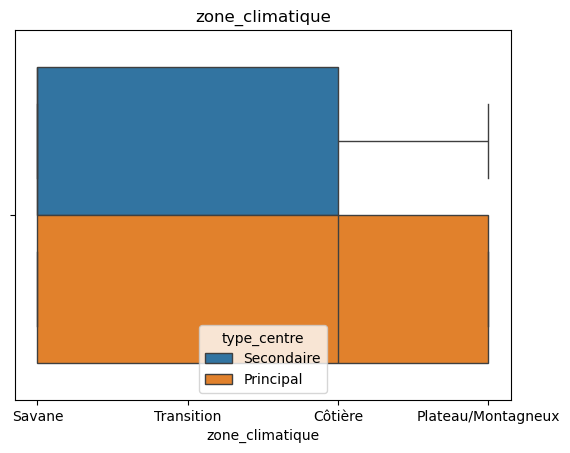

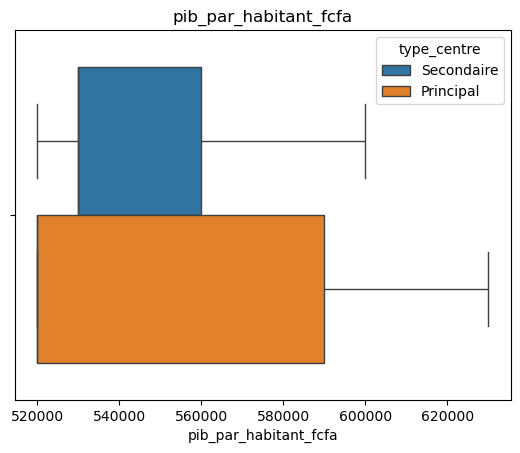

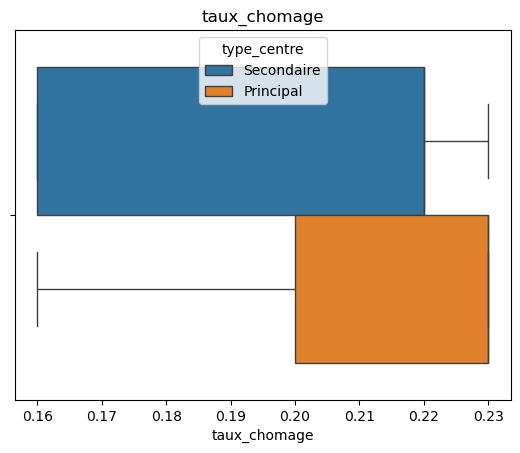

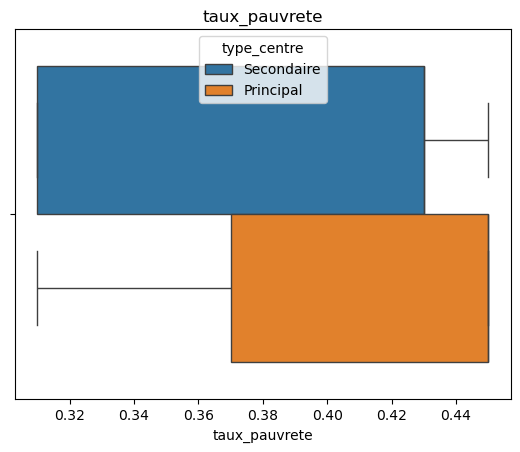

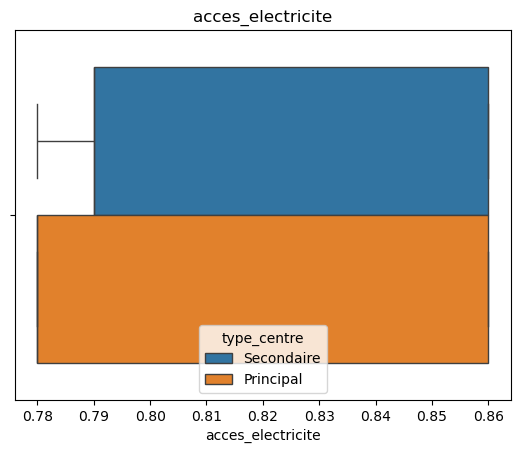

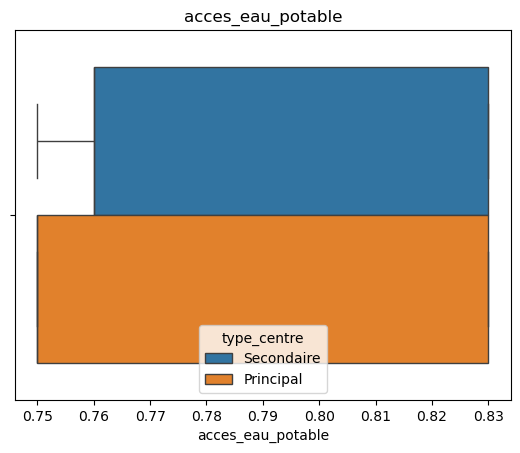

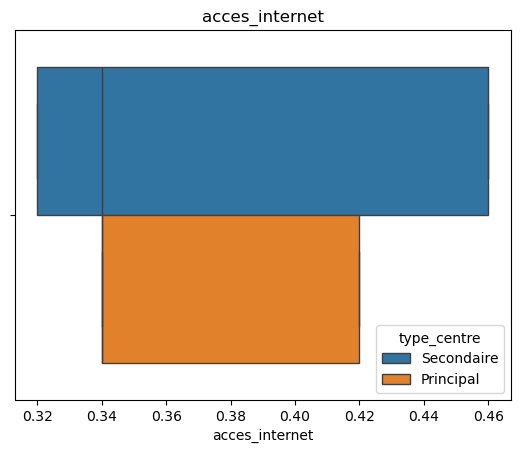

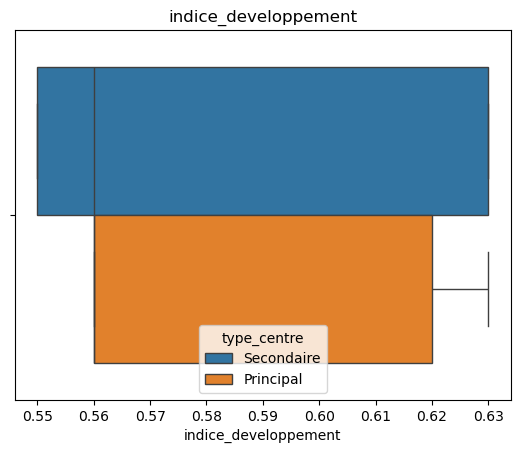

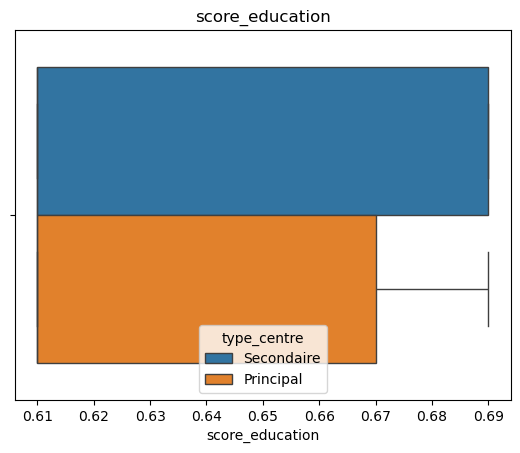

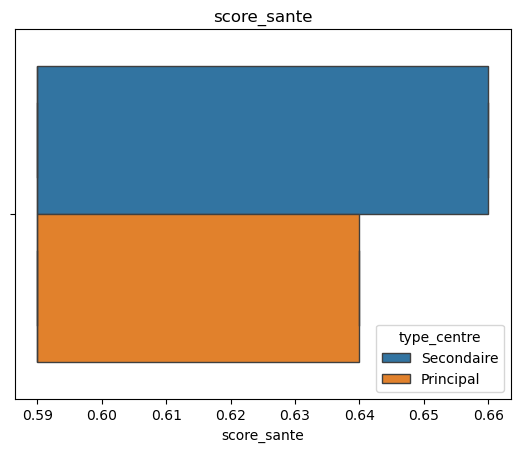

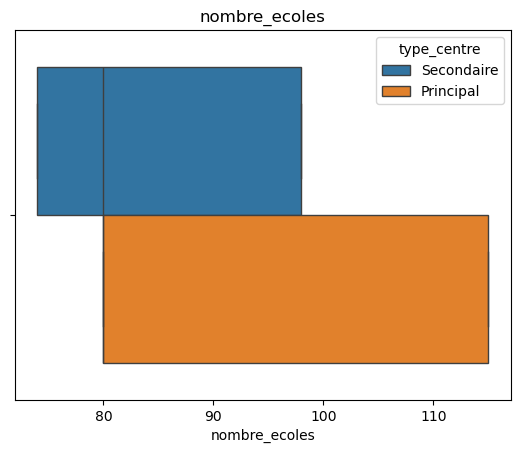

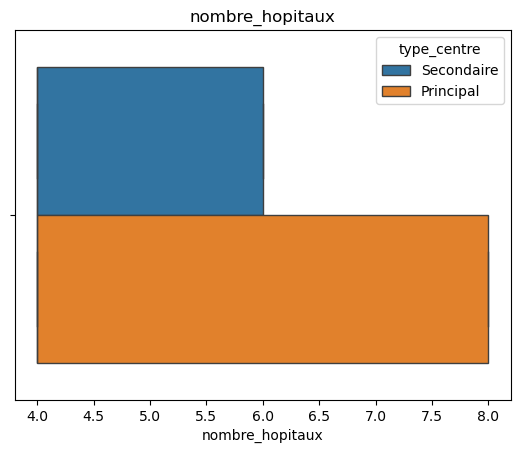

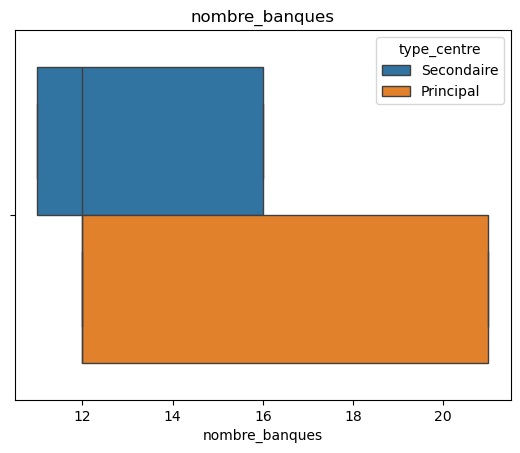

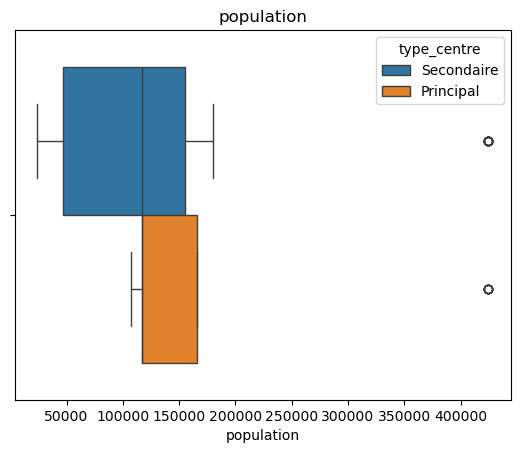

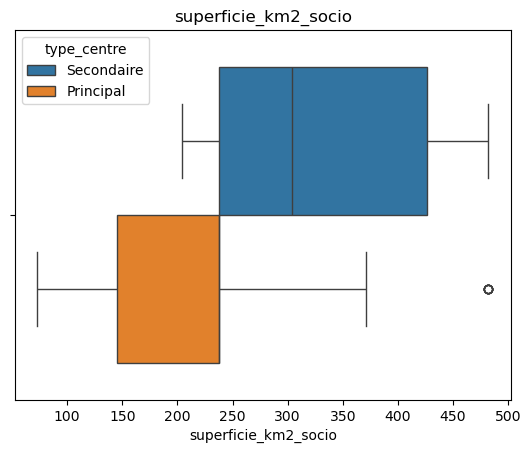

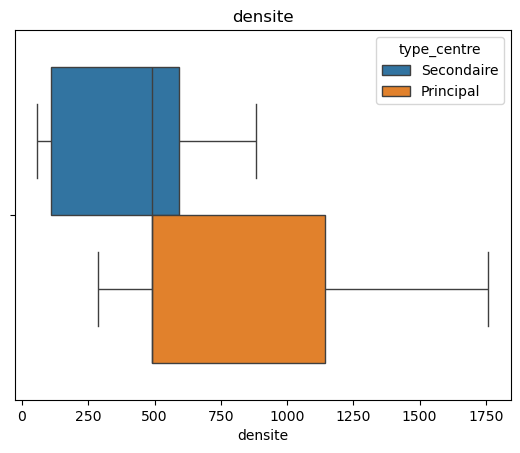

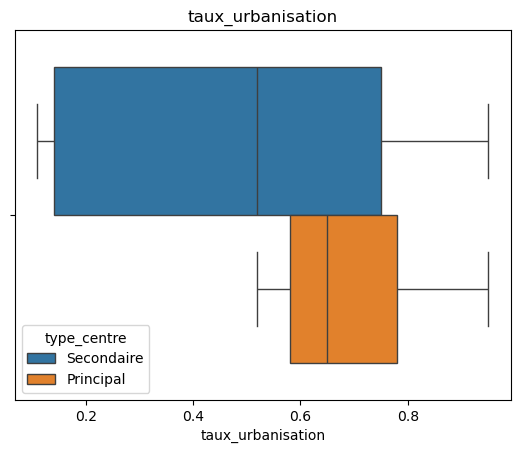

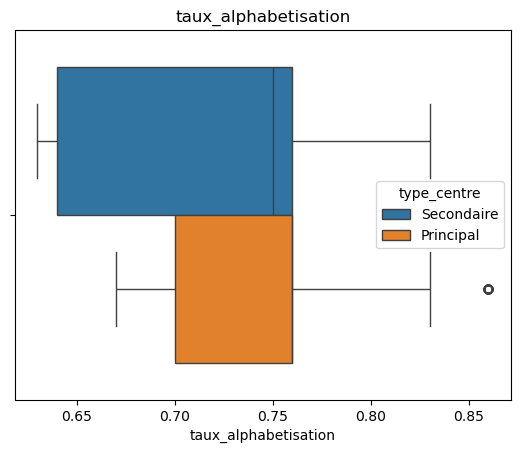

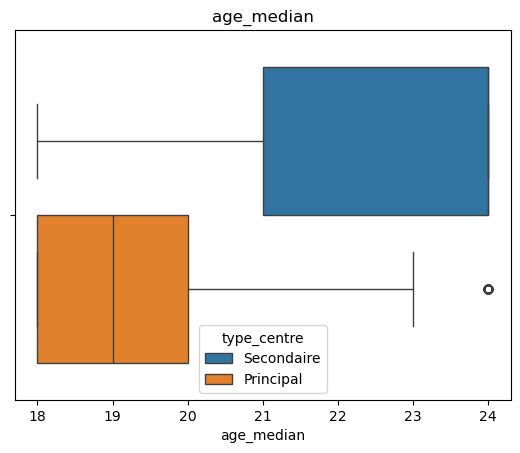

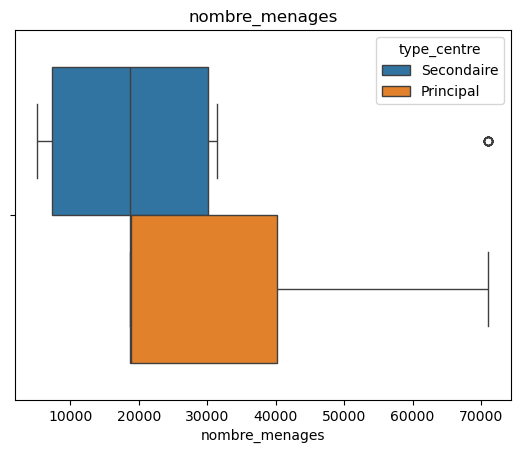

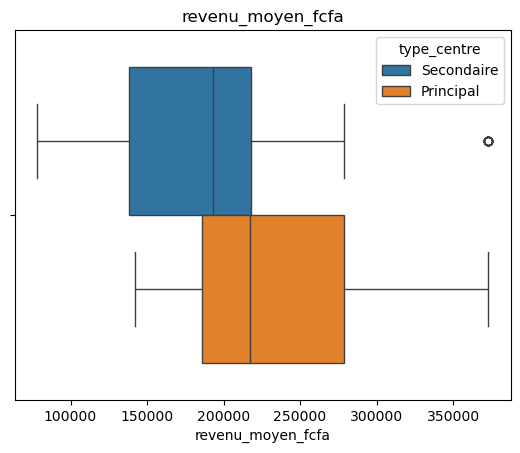

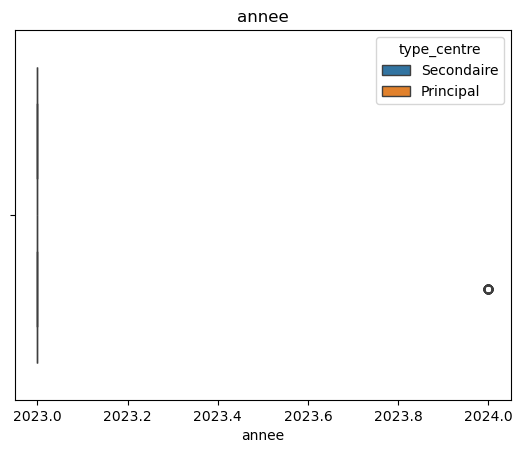

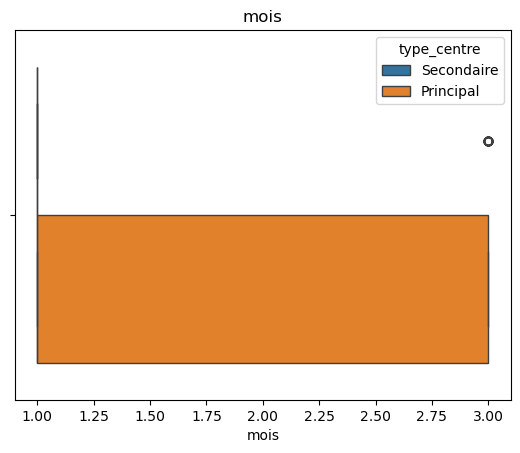

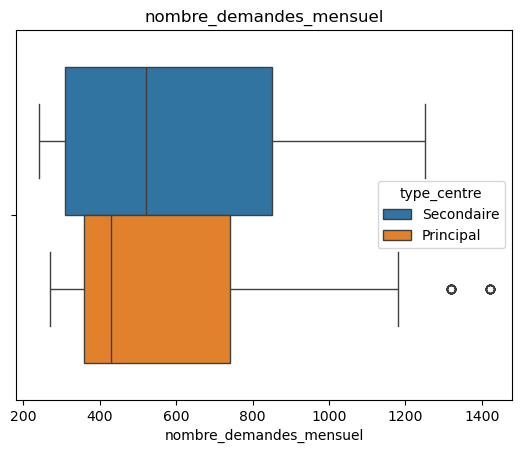

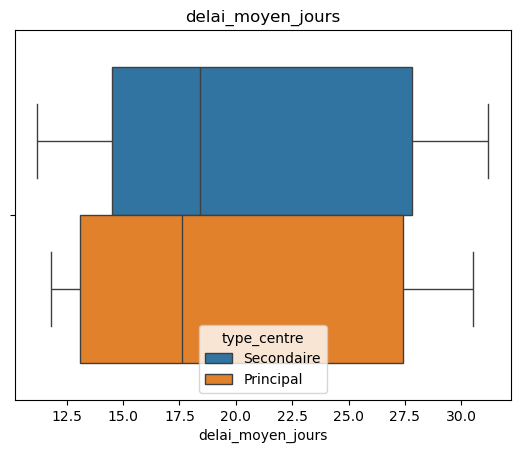

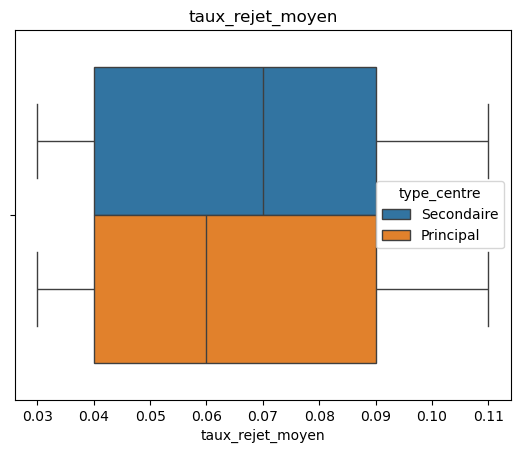

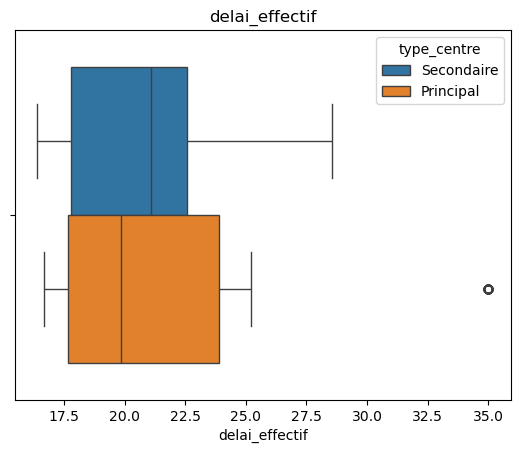

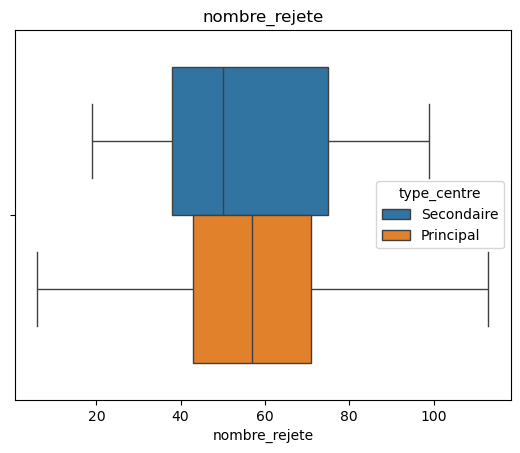

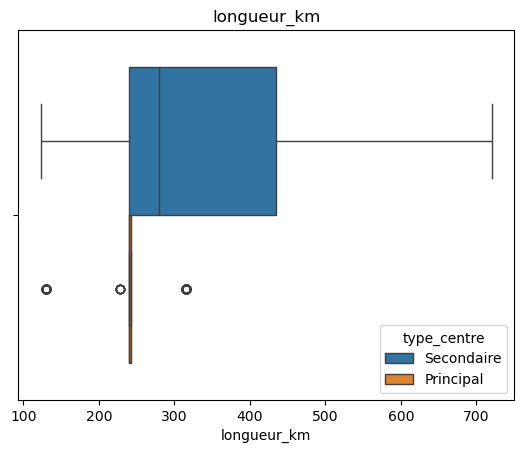

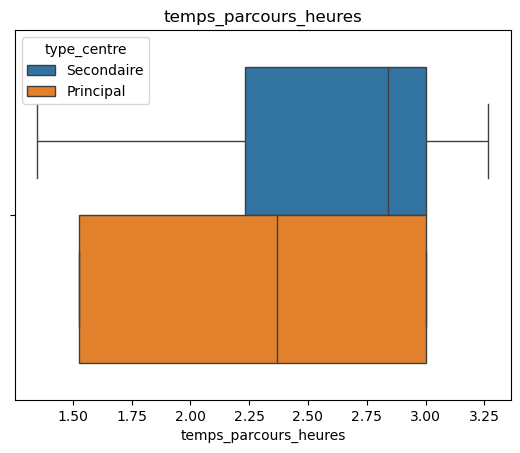

In [22]:
for col in my_df.columns:
    plt.title(col)
    sns.boxplot(data=my_df,x=my_df[col], hue = 'type_centre')
    plt.show()

In [23]:
sns.pairplot(data=my_df, diag_kws={'color': 'blue'})
plt.show()